/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 2.5132 - val_loss: 3.2126
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.3530 - val_loss: 3.1384
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.5095 - val_loss: 3.0728
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.7841 - val_loss: 3.0022
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.9235 - val_loss: 2.9354
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2109 - val_loss: 2.8614
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.6078 - val_loss: 2.7842
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4541 - val_loss: 2.6999
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.7136 - val_loss: 2.6106
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.5213 - val_loss: 2.5137
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.3051 - val_loss: 2.4125
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.

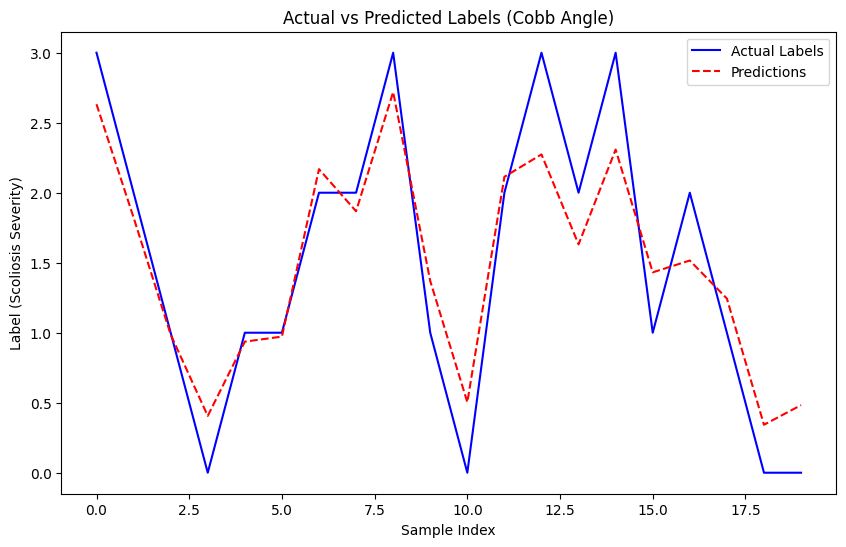

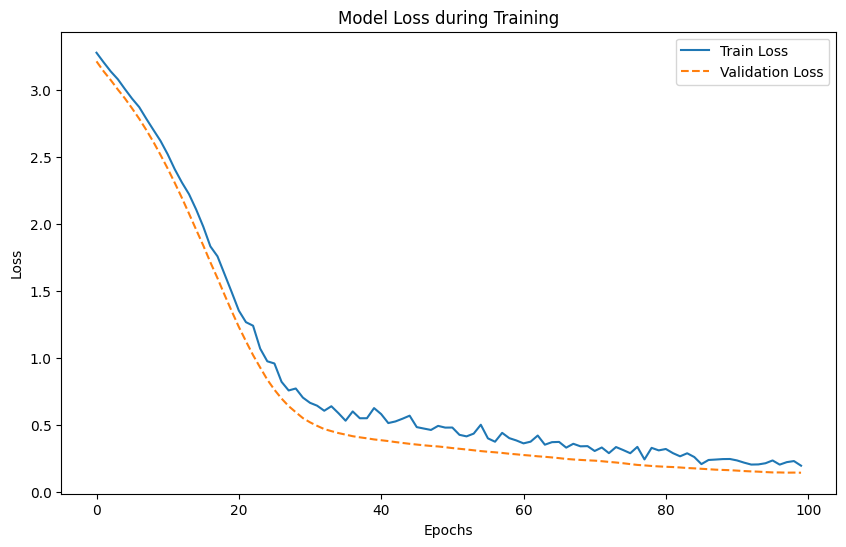

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequentia
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# 0~40 사이의 랜덤 Cobb 각도 100개 생성
np.random.seed(42)  # 랜덤 시드를 설정하여 결과를 재현 가능하게 만듬
random_cobb_angles = np.random.uniform(0, 40, 100)  # 0~40 사이에서 랜덤으로 100개의 Cobb 각도를 생성

# 각 Cobb 각도에 해당하는 상태를 생성 (예: 0~10은 정상, 30~40은 심각)
labels = np.digitize(random_cobb_angles, bins=[10, 20, 30])  # Cobb 각도 값에 따라 4개 범주로 레이블을 분류

# 데이터프레임으로 변환
data = pd.DataFrame({'Cobb_Angle': random_cobb_angles, 'Label': labels})  # 랜덤 Cobb 각도와 레이블을 데이터프레임으로 변환

# 데이터 정규화 (Cobb 각도만 사용)
scaler = MinMaxScaler(feature_range=(0, 1))  # MinMaxScaler 객체 생성 (0과 1 사이로 정규화)
scaled_data = scaler.fit_transform(data[['Cobb_Angle']])  # Cobb 각도를 0~1 사이로 정규화

# 모델 입력에 맞게 시퀀스 형태로 변환 (여기서는 한 시점만 사용하므로 시퀀스 길이는 1)
X = scaled_data.reshape((scaled_data.shape[0], 1, 1))  # 데이터를 3D 배열로 변환: (샘플 수, 시간 단계 수, 특성 수)
y = data['Label'].values  # 레이블(척추측만증 상태) 추출

# 훈련/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)  # 데이터를 훈련 세트(80%)와 테스트 세트(20%)로 분리

# LSTM 모델 구성
model = Sequential()  # Sequential 모델을 사용하여 순차적인 층을 구성
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))  # LSTM 층 추가, 50개의 뉴런 사용
model.add(Dropout(0.2))  # Dropout 층 추가 (과적합 방지 목적, 20%의 뉴런을 무작위로 생략)
model.add(Dense(1, activation='linear'))  # Dense 층 추가, 출력층에서 연속적인 값 예측 (Cobb 각도 예측)

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')  # Adam 옵티마이저와 평균 제곱 오차 손실 함수 사용

# 모델 학습
history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test))  # 모델 학습, 100 에폭 동안 배치 크기 8로 학습

# 모델 평가
loss = model.evaluate(X_test, y_test)  # 테스트 데이터를 사용해 모델 성능 평가 (손실 함수 값 출력)
print(f'Model loss: {loss}')  # 손실 값을 출력

# 예측 예시
predictions = model.predict(X_test)  # 테스트 세트에 대해 모델 예측 수행

# 1. Cobb 각도와 예측값 비교 시각화
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정
plt.plot(y_test, label='Actual Labels', color='blue')  # 실제 레이블을 파란색 선으로 표시
plt.plot(predictions, label='Predictions', color='red', linestyle='--')  # 예측값을 빨간색 점선으로 표시
plt.title('Actual vs Predicted Labels (Cobb Angle)')  # 그래프 제목 설정
plt.xlabel('Sample Index')  # x축 레이블 설정
plt.ylabel('Label (Scoliosis Severity)')  # y축 레이블 설정
plt.legend()  # 범례 추가
plt.show()  # 그래프 출력

# 2. 훈련 손실 함수 시각화
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정
plt.plot(history.history['loss'], label='Train Loss')  # 훈련 손실 그래프
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--')  # 검증 손실 그래프 (점선으로 표시)
plt.title('Model Loss during Training')  # 그래프 제목 설정
plt.xlabel('Epochs')  # x축 레이블 설정 (에폭 수)
plt.ylabel('Loss')  # y축 레이블 설정 (손실 값)
plt.legend()  # 범례 추가
plt.show()  # 그래프 출력
